In [2]:
from parse_generators import parse_generators

In [3]:
df = parse_generators(2018)
df['plant_id'] = df.index.str.split('_').str[0]

In [10]:
wind = df[df.energy_source == 'wind']

In [13]:
wind.sort_values('plant_id', ascending=False).head()

,utility_name,plant_name,state,county,status,sector,nameplate_capacity,energy_source_1,operating_year,planned_retirement_year,energy_source,plant_id
generator_uuid,,,,,,,,,,,,
944.0_10,City of Geneseo - (IL),Geneseo,IL,Henry,OP,Electric Utility,1.5,WND,2009.0,NaN,wind,944.0
944.0_11,City of Geneseo - (IL),Geneseo,IL,Henry,OP,Electric Utility,1.5,WND,2009.0,NaN,wind,944.0
90.0_EWT 1,Nome Joint Utility Systems,Snake River,AK,Nome,OP,Electric Utility,0.9,WND,2013.0,NaN,wind,90.0
90.0_EWT 2,Nome Joint Utility Systems,Snake River,AK,Nome,OP,Electric Utility,0.9,WND,2013.0,NaN,wind,90.0
7974.0_WTC2,Basin Electric Power Coop,Chamberlain Wind Project,SD,Brule,OP,Electric Utility,1.3,WND,2001.0,NaN,wind,7974.0


count    589.000000
mean     102.694228
std       93.218158
min        0.100000
25%       20.000000
50%       90.000000
75%      162.000000
max      600.000000
Name: nameplate_capacity, dtype: float64

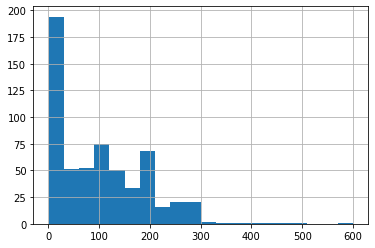

In [26]:
wind_plant_capacity = df[
    (df.operating_year >= 2010) & (df.energy_source == 'wind')
].groupby('plant_id').nameplate_capacity.sum()
wind_plant_capacity.hist(bins=20);
wind_plant_capacity.describe()

count    1682.000000
mean       12.792925
std        28.485492
min         0.100000
25%         2.000000
50%         4.400000
75%         8.000000
max       305.300000
Name: nameplate_capacity, dtype: float64

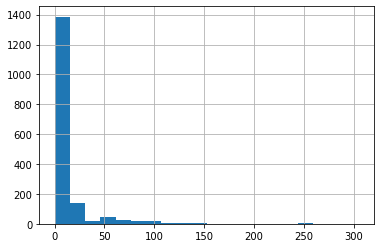

In [29]:
solar_plant_capacity = df[
    (df.operating_year >= 2015) & (df.energy_source == 'solar')
].groupby('plant_id').nameplate_capacity.sum()
solar_plant_capacity.hist(bins=20);
solar_plant_capacity.describe()

In [32]:
df.groupby(['plant_id', 'energy_source']).nameplate_capacity.sum().reset_index().groupby('energy_source').median()

,nameplate_capacity
energy_source,
by-products,5.60
coal,723.45
hydro,8.00
natural gas,224.35
nuclear,1749.10
oil,8.75
other,29.80
solar,3.50
storage,4.00


In [34]:
capacity_by_source = df.groupby('energy_source').nameplate_capacity.sum()
capacity_by_source

energy_source
by-products      6517.4
coal           254839.4
hydro           97028.8
natural gas    477153.6
nuclear        104270.2
oil             31738.3
other            3731.3
solar           31841.5
storage           888.9
wind            94725.8
Name: nameplate_capacity, dtype: float64

In [35]:
capacity_by_source.sum()

1102735.2000000014

In [45]:
# number of plants
df[df.nameplate_capacity >= 1].groupby('energy_source').plant_id.nunique()

energy_source
by-products     356
coal            264
hydro          1237
natural gas    1203
nuclear          60
oil             605
other            68
solar          2559
storage          98
wind           1054
Name: plant_id, dtype: int64